In [1]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Getting our data
news = fetch_20newsgroups(subset='all',remove=('headers', "footers", "quotes"))
X = news.data
y = news.target

In [3]:
#Converting our documents into a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(strip_accents='ascii')
X = vectorizer.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) #Splitting our data

In [5]:
from decimal import Decimal, getcontext
f1_score = 0
alpha = Decimal(1)
getcontext().prec = 2
while(True): #While f1 is less than 0.69 or alpha less than 0 we decrease alpha by 0.01 and classify again
    mnb = MultinomialNB(alpha=float(alpha))
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    f1_score = metrics.f1_score(y_test, y_pred,average='macro')

    alpha = alpha - Decimal(0.01)
    if f1_score > 0.69 or alpha < 0:
        break

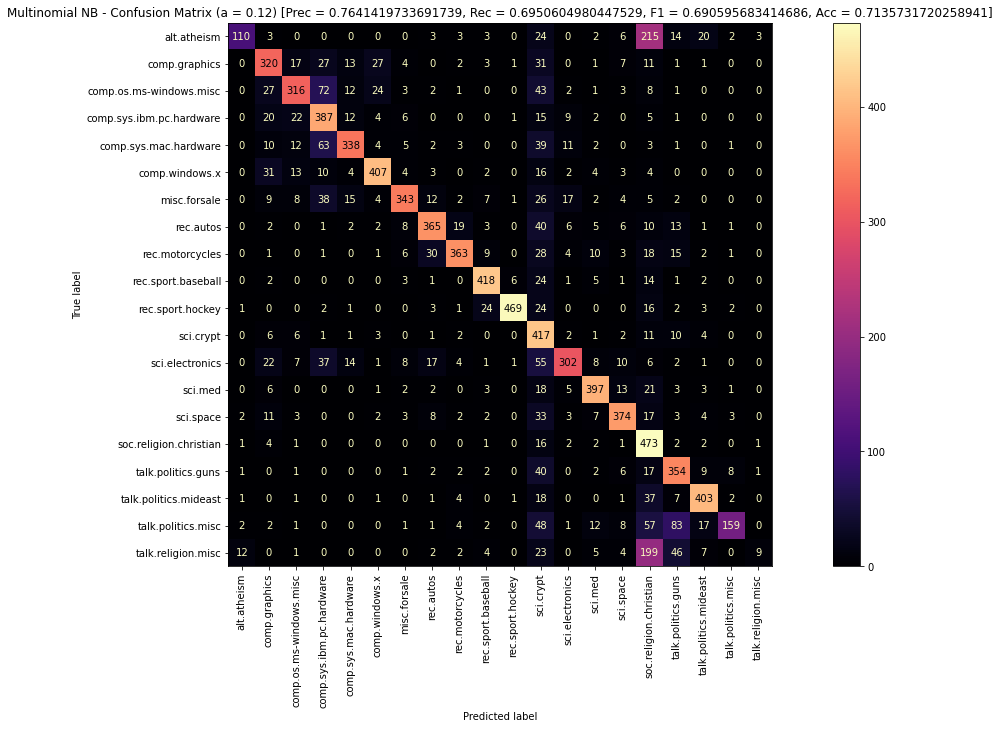

In [6]:
#Printing the Confusion Matrix
class_names = news.target_names
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(22,10))
disp = plot_confusion_matrix(mnb, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.magma,
                                xticks_rotation='vertical',
                                # normalize='true', #Looks weird normalized
                                # values_format='.2f'\
                                ax=axs
                                )
prec = metrics.precision_score(y_test, y_pred,average='macro')
rec = metrics.recall_score(y_test, y_pred,average='macro')
acc = metrics.accuracy_score(y_test, y_pred)
disp.ax_.set_title(f'Multinomial NB - Confusion Matrix (a = {float(alpha)}) [Prec = {prec}, Rec = {rec}, F1 = {f1_score}, Acc = {acc}]')

plt.savefig('ConfusionMatrix.svg')
plt.show()